<a href="https://colab.research.google.com/github/soyoung33500/hardhet/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9DAI%EA%B0%9C%EB%A1%A0_%EC%A0%84%EC%86%8C%EC%98%81_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%BD%94%EB%93%9C_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계데이터사이언스전공 202010936 전소영

# 학습

In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# yolov5 git 다운로드
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

Cloning into 'yolov5'...
remote: Enumerating objects: 16013, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 16013 (delta 25), reused 23 (delta 13), pack-reused 15967
Receiving objects: 100% (16013/16013), 14.66 MiB | 24.18 MiB/s, done.
Resolving deltas: 100% (10987/10987), done.
/content/yolov5
HEAD is now at fbe67e4 Fix `OMP_NUM_THREADS=1` for macOS (#8624)


In [ ]:
#,패키지, 유틸, 모델, 기본가중치 다운로드
!pip install -qr requirements.txt
import torch

from IPython.display import Image, clear_output
from utils.downloads import attempt_download

In [ ]:
#roboflow 에서 데이터셋 다운로드
%cd /content/yolov5

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5WLMzX4BhjFxpVuILz1o")
project = rf.workspace("joseph-nelson").project("hard-hat-workers")
dataset = project.version(13).download("yolov5")

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Succes

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Workers-13 in yolov5pytorch:: 100%|██████████| 33746/33746 [00:05<00:00, 6677.03it/s]


In [ ]:
#학습시키기
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 32 --epochs 22 --data {dataset.location}/data.yaml \
--cfg ./models/yolov5s.yaml --weights '/content/drive/MyDrive/yolov5/yolov5s_results2/weights/best.pt' --project /content/drive/MyDrive/ --name yolov5s_results1

/content/yolov5
2023-10-24 03:11:52.775252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-24 03:11:53.733133: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/drive/MyDrive/yolov5/yolov5s_results2/weights/best.pt, cfg=./models/yolov5s.yaml, data=/content/yolov5/Hard-Hat-Workers-13/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=22, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/, name=yolov5s_results1, exist_ok=False, quad=False, cos

In [ ]:
#학습시키기
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 32 --epochs 10 --data {dataset.location}/data.yaml \
--cfg ./models/yolov5s.yaml --weights '/content/drive/MyDrive/yolov5s_results1/weights/best.pt' --project /content/drive/MyDrive/ --name yolov5s_results2

/content/yolov5
2023-10-30 13:31:00.419474: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 13:31:01.418771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/drive/MyDrive/yolov5s_results1/weights/best.pt, cfg=./models/yolov5s.yaml, data=/content/yolov5/Hard-Hat-Workers-13/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/, name=yolov5s_results2, exist_ok=False, quad=False, cos_lr=Fal

In [ ]:
#결과 폴더를 압축해서 구글 드라이브에 저장
!zip -r /content/drive/MyDrive/result2.zip /content/yolov5/runs/train/yolov5s_results/

  adding: content/yolov5/runs/train/yolov5s_results/ (stored 0%)
  adding: content/yolov5/runs/train/yolov5s_results/weights/ (stored 0%)
  adding: content/yolov5/runs/train/yolov5s_results/weights/best.pt (deflated 10%)
  adding: content/yolov5/runs/train/yolov5s_results/weights/last.pt (deflated 10%)
  adding: content/yolov5/runs/train/yolov5s_results/R_curve.png (deflated 11%)
  adding: content/yolov5/runs/train/yolov5s_results/PR_curve.png (deflated 20%)
  adding: content/yolov5/runs/train/yolov5s_results/val_batch2_pred.jpg (deflated 8%)
  adding: content/yolov5/runs/train/yolov5s_results/events.out.tfevents.1666505440.7bcadb40cced.486.0 (deflated 23%)
  adding: content/yolov5/runs/train/yolov5s_results/val_batch1_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/train/yolov5s_results/F1_curve.png (deflated 9%)
  adding: content/yolov5/runs/train/yolov5s_results/labels.jpg (deflated 29%)
  adding: content/yolov5/runs/train/yolov5s_results/val_batch2_labels.jpg (deflated 8%)
 

# 테스트 데이터 검증

In [ ]:
# data.yaml에 test 경로 추가해야 함
!python /content/yolov5/val.py --task test --data /content/yolov5/Hard-Hat-Workers-13/data.yaml \
--weights /content/drive/MyDrive/yolov5s_results2/weights/best.pt --img 416 --save-txt --save-conf

val: data=/content/yolov5/Hard-Hat-Workers-13/data.yaml, weights=['/content/drive/MyDrive/yolov5s_results2/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/yolov5/Hard-Hat-Workers-13/test/labels' images and labels...706 found, 0 missing, 0 empty, 0 corrupt: 100% 706/706 [00:00<00:00, 8045.06it/s]
test: New cache created: /content/yolov5/Hard-Hat-Workers-13/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 23/23 [00:33<00:00,  1.44s/it]
                 all        706       2641       0.94      0.913      0.959 

In [ ]:
#학습된 가중치로 test이미지 탐색
%cd /content/yolov5/
!python detect.py --weights /content/drive/MyDrive/yolov5s_results2/weights/best.pt --img 416 --conf 0.4 --source ./Hard-Hat-Workers-13/test/images --save-txt

/content/yolov5
detect: weights=['/content/drive/MyDrive/yolov5s_results2/weights/best.pt'], source=./Hard-Hat-Workers-13/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/706 /content/yolov5/Hard-Hat-Workers-13/test/images/005298_jpg.rf.8735bf2b956d26c1f6ef23b09c93fe97.jpg: 416x416 8 helmets, Done. (0.048s)
image 2/706 /content/yolov5/Hard-Hat-Workers-13/test/images/005299_jpg.rf.7e8cbce0496f979e698687003725214c.jpg: 416x416 2 helmets, Done. (0.035s)
image 3/706 /content/yolov5/Hard-Hat-

In [ ]:
#이미지 탐색결과 exp폴더에 저장
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# mAP

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/results.xlsx")
df

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2,Unnamed: 14,Unnamed: 15
0,0,0.094882,0.046213,0.020608,0.58632,0.013033,0.009321,0.00262,0.082655,0.033144,0.018284,0.070065,0.003326,0.003326,NaN,1
1,1,0.074194,0.039991,0.017092,0.51875,0.505210,0.456460,0.17980,0.053927,0.024527,0.007748,0.039933,0.006528,0.006528,NaN,2
2,2,0.059805,0.034794,0.009479,0.80979,0.701710,0.773670,0.35002,0.045890,0.018784,0.004022,0.009669,0.009597,0.009597,NaN,3
3,3,0.050337,0.031468,0.006934,0.89460,0.789780,0.872800,0.44025,0.039826,0.016241,0.002734,0.009406,0.009406,0.009406,NaN,4
4,4,0.045928,0.029317,0.005949,0.89672,0.830580,0.901670,0.49157,0.035576,0.015616,0.002288,0.009406,0.009406,0.009406,NaN,5
5,5,0.043631,0.028093,0.005220,0.90517,0.830950,0.904940,0.49962,0.036438,0.014911,0.002534,0.009208,0.009208,0.009208,NaN,6
6,6,0.041930,0.027479,0.004662,0.91349,0.845850,0.916070,0.52202,0.034640,0.014604,0.002068,0.009010,0.009010,0.009010,NaN,7
7,7,0.040753,0.026828,0.004321,0.90972,0.855380,0.922290,0.48847,0.036713,0.014360,0.001948,0.008812,0.008812,0.008812,NaN,8
8,8,0.039758,0.025897,0.004107,0.92836,0.859010,0.926860,0.52239,0.033641,0.014014,0.001736,0.008614,0.008614,0.008614,NaN,9
9,7,0.040759,0.026609,0.004366,0.91488,0.859510,0.924980,0.52716,0.033532,0.015213,0.002075,0.008812,0.008812,0.008812,NaN,10


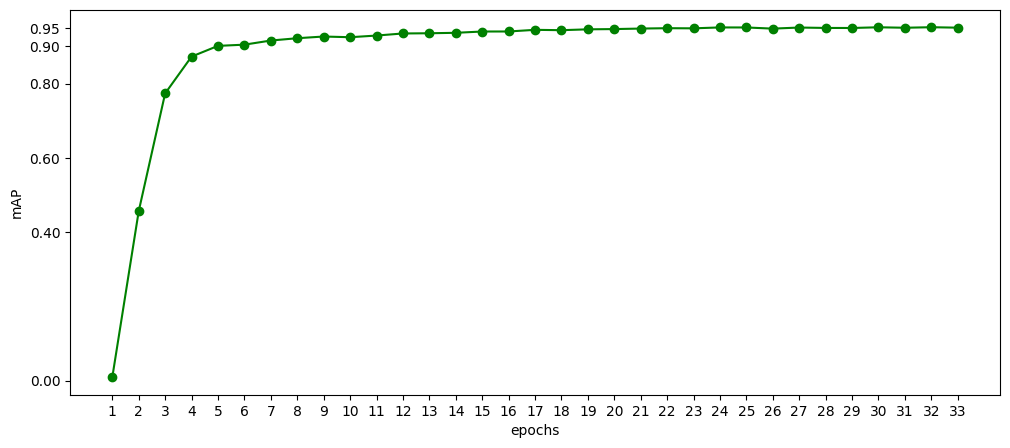

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(1, 34), df.iloc[:,6], color = 'green', marker = 'o', linestyle = 'solid')
plt.xticks(list(range(1, 34)))
plt.yticks([0.0, 0.4, 0.6, 0.8, 0.9, 0.95])
plt.xlabel("epochs")
plt.ylabel("mAP")
plt.show()

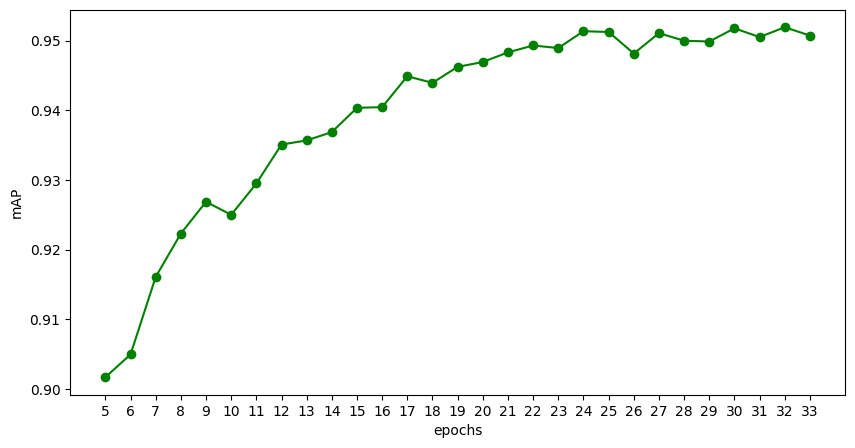

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(5, 34), df.iloc[4:,6], color = 'green', marker = 'o', linestyle = 'solid')
plt.xticks(list(range(5, 34)))
plt.xlabel("epochs")
plt.ylabel("mAP")
plt.show()

In [ ]:
df[df.iloc[:, 6] == max(df.iloc[:, 6])].iloc[:, 6]

31    0.95191
Name:      metrics/mAP_0.5, dtype: float64

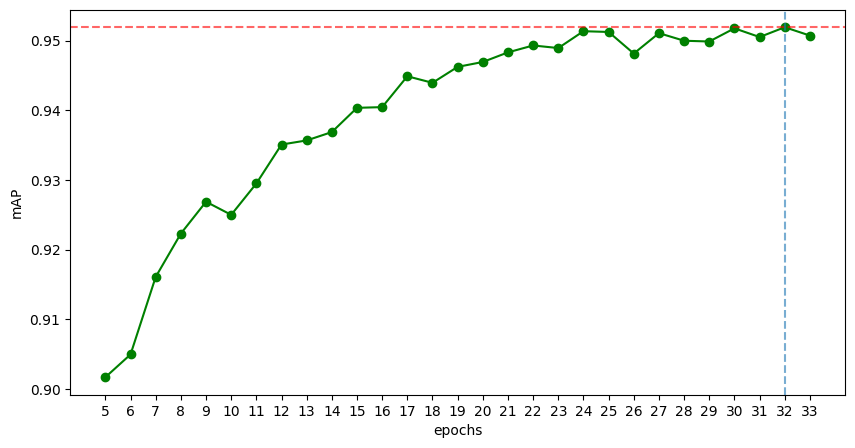

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(5, 34), df.iloc[4:,6], color = 'green', marker = 'o', linestyle = 'solid')
plt.axhline(max(df.iloc[:, 6]), color = 'red', linestyle = '--', alpha = 0.6)
plt.axvline(32, linestyle = '--', alpha = 0.6)
plt.xticks(list(range(5, 34)))
plt.xlabel("epochs")
plt.ylabel("mAP")
plt.show()

# 인터넷 이미지 예측

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5s_results2/weights/best.pt --img 416 --conf 0.5 --source /content/11.jpg

detect: weights=['/content/drive/MyDrive/yolov5s_results2/weights/best.pt'], source=/content/11.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/11.jpg: 288x416 5 helmets, Done. (0.050s)
Speed: 0.6ms pre-process, 49.5ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp5


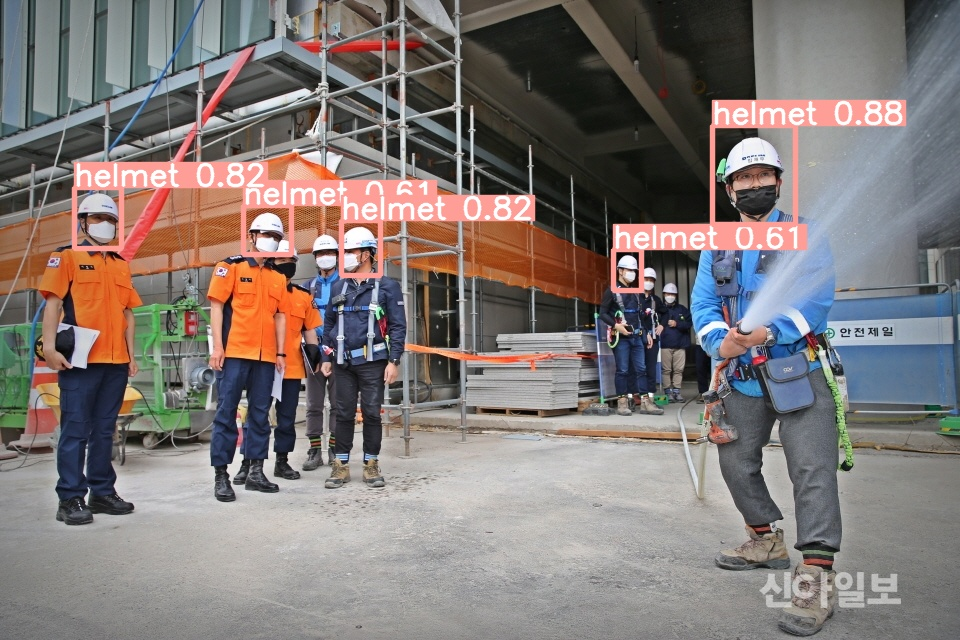

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/yolov5/runs/detect/exp5/11.jpg'))

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5s_results2/weights/best.pt --img 416 --conf 0.5 --source /content/22.jpg

detect: weights=['/content/drive/MyDrive/yolov5s_results2/weights/best.pt'], source=/content/22.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/22.jpg: 320x416 3 helmets, Done. (0.055s)
Speed: 0.7ms pre-process, 54.6ms inference, 2.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp4


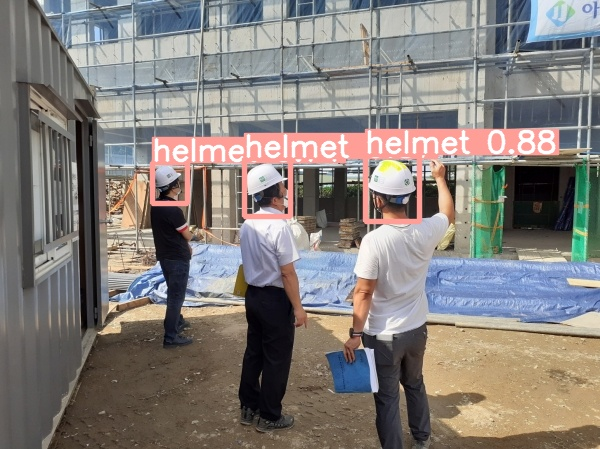

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/yolov5/runs/detect/exp4/22.jpg'))

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5s_results2/weights/best.pt --img 416 --conf 0.5 --source /content/88.jpg

detect: weights=['/content/drive/MyDrive/yolov5s_results2/weights/best.pt'], source=/content/88.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/88.jpg: 320x416 13 heads, Done. (0.163s)
Speed: 2.6ms pre-process, 162.7ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp6


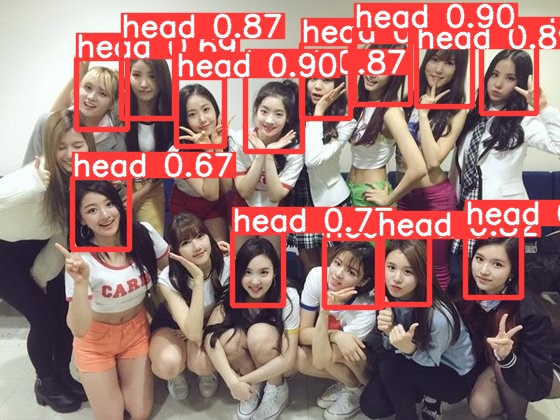

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/yolov5/runs/detect/exp6/88.jpg'))

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5s_results2/weights/best.pt --img 416 --conf 0.5 --source /content/33.jpg

detect: weights=['/content/drive/MyDrive/yolov5s_results2/weights/best.pt'], source=/content/33.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/33.jpg: 320x416 2 heads, 1 helmet, Done. (0.054s)
Speed: 0.5ms pre-process, 53.7ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp3


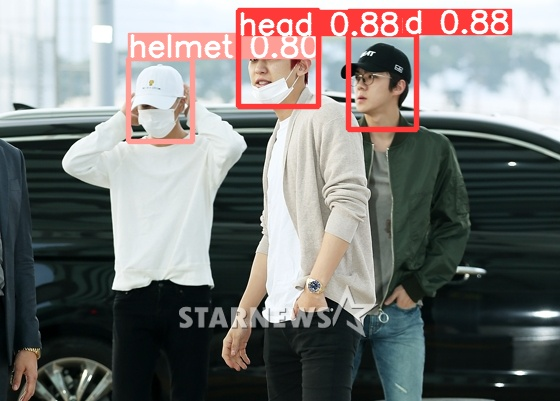

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/yolov5/runs/detect/exp3/33.jpg'))

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5s_results2/weights/best.pt --img 416 --conf 0.5 --source /content/77.jpg

detect: weights=['/content/drive/MyDrive/yolov5s_results2/weights/best.pt'], source=/content/77.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/77.jpg: 320x416 2 heads, 6 helmets, Done. (0.158s)
Speed: 3.0ms pre-process, 157.7ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp5


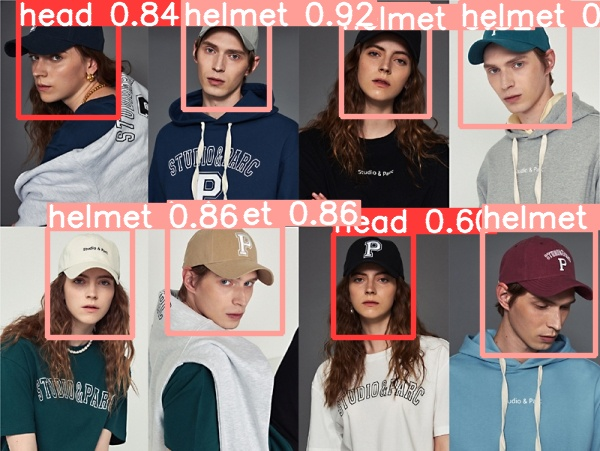

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/yolov5/runs/detect/exp5/77.jpg'))

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5/yolov5s_results2/weights/best.pt --img 416 --conf 0.5 --source /content/55.jpg

detect: weights=['/content/drive/MyDrive/yolov5/yolov5s_results2/weights/best.pt'], source=/content/55.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/55.jpg: 416x320 2 heads, 7 helmets, Done. (0.161s)
Speed: 3.6ms pre-process, 161.3ms inference, 32.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


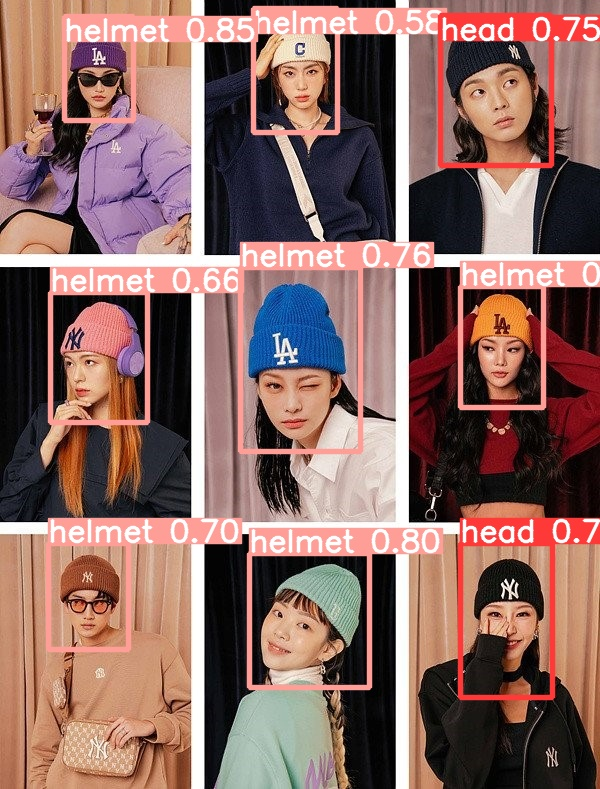

In [ ]:
display(Image(filename='/content/yolov5/runs/detect/exp/55.jpg'))